Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-28 20:46:17--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-28 20:46:18--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-28 20:46:18 (57.6 MB/s) -

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
# prompt: Carga y exploración de datos Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

# Importa la librería pandas
import pandas as pd

# Lee el archivo CSV
data = pd.read_csv('Mall_Customers.csv')

# Muestra las primeras filas del DataFrame
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [ ]:
# prompt: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

# Descripción de las variables del conjunto de datos

#CustomerID: Identificador único para cada cliente.
#Genre: Género del cliente (Masculino o Femenino).
#Age: Edad del cliente.
#Annual Income (k$): Ingreso anual del cliente en miles de dólares.
#Spending Score (1-100): Puntuación de gasto del cliente, que representa cuánto gasta en el centro comercial (1 siendo el mínimo y 100 el máximo).


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [ ]:
# prompt: Preprocesamiento de los datos Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

# Convierte la columna Gender a una variable numérica
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Selecciona las columnas para el modelo de K-means
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



In [ ]:
La normalización de los datos es crucial antes de aplicar el algoritmo K-means porque este algoritmo se basa en la distancia entre los puntos de datos para formar clusters. Si las variables tienen diferentes escalas, las variables con valores más altos influirán desproporcionadamente en el cálculo de la distancia, lo que puede llevar a resultados sesgados e inexactos.

La normalización consiste en transformar los datos para que tengan una media de 0 y una desviación estándar de 1.  Esto se logra restando la media de cada variable a cada valor y dividiendo el resultado por la desviación estándar de esa variable.  En esencia, se escala cada variable a una distribución normal estándar.  Después de la normalización, todas las variables contribuyen por igual al cálculo de la distancia, lo que permite que K-means funcione de manera más efectiva y produzca clusters más significativos.


Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


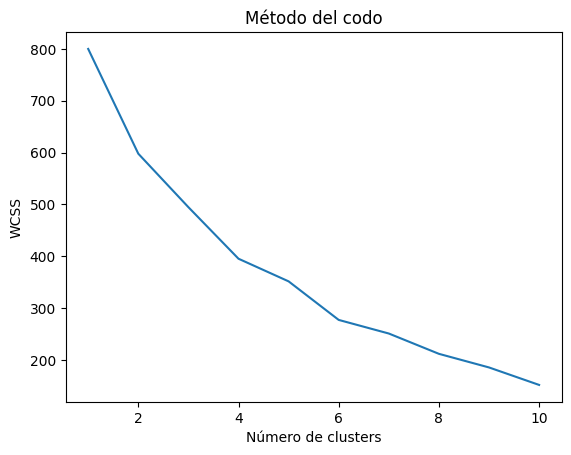

In [6]:
# prompt: : Método del codo para determinar el número óptimo de clusters Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has been loaded previously
# Convierte la columna Gender a una variable numérica
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Selecciona las columnas para el modelo de K-means
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" en la gráfica del método del codo parece formarse alrededor de los **5 clusters**.  Aunque hay un ligero cambio de pendiente entre 5 y 6, la disminución en la WCSS se hace menos pronunciada a partir de 5.  Por lo tanto, **5 clusters** parecen ser un número apropiado para este ejercicio, ya que representa un buen equilibrio entre minimizar la varianza dentro de los clusters y evitar un exceso de clusters que podrían ser demasiado pequeños y poco representativos.



Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [8]:
# prompt: Ajuste del modelo K-means y asignación de clusters Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

# Ajusta el modelo K-means con 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Asigna a cada cliente un número de cluster
data['Cluster'] = kmeans.labels_

# Muestra las primeras filas del DataFrame con la columna de clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        2  
1        2  
2        4  
3        4  
4        4  


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

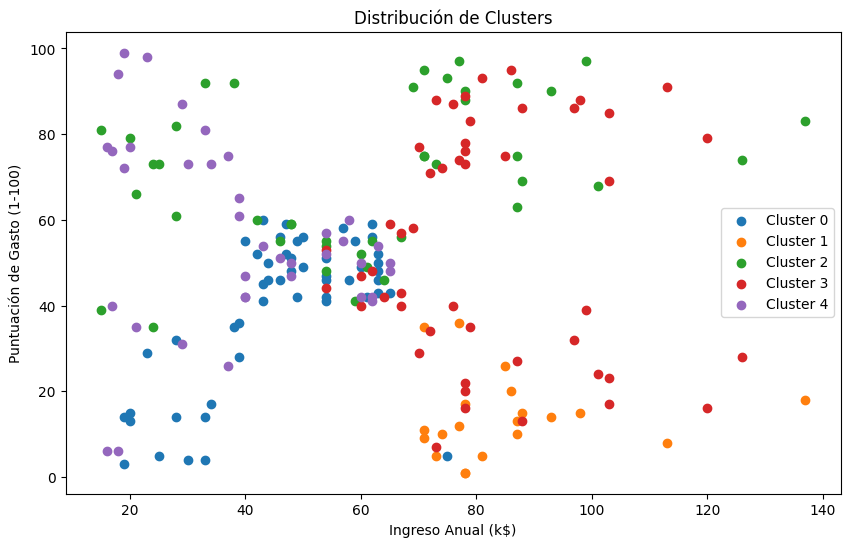

         CustomerID               Gender                  Age             \
               mean        std      mean       std       mean        std   
Cluster                                                                    
0         65.333333  31.938483  0.490196  0.504878  56.470588   8.582198   
1        159.500000  21.273903  0.000000  0.000000  39.500000  12.550949   
2        100.809524  61.330865  0.000000  0.000000  28.690476   7.110583   
3        151.510204  32.090447  1.000000  0.000000  37.897959   8.244303   
4         50.526316  36.130946  1.000000  0.000000  27.315789   6.456111   

        Annual Income (k$)            Spending Score (1-100)             
                      mean        std                   mean        std  
Cluster                                                                  
0                46.098039  14.006077              39.313725  17.324538  
1                85.150000  16.030481              14.050000   9.566801  
2                60.9

In [9]:
# prompt: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters? español

# Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

# Para responder a esta pregunta, se necesita analizar la distribución de los clientes en los 5 clusters generados.
# Lo ideal es realizar un análisis más profundo, visualizando la distribución de los clusters en función de las variables clave como "Annual Income" y "Spending Score".
# Un gráfico de dispersión con los clusters coloreados de manera diferente nos dará una idea de cómo se agrupan los clientes en base a sus ingresos y hábitos de gasto.
# También se pueden calcular las estadísticas descriptivas para cada cluster, como la media y desviación estándar de los atributos clave, para identificar las características distintivas de cada segmento.

# Ejemplo de visualización (necesita la librería matplotlib):
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'], data[data['Cluster'] == cluster]['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.title('Distribución de Clusters')
plt.legend()
plt.show()

# Después de generar el gráfico, se puede observar la distribución de los clientes:
# * Cluster 0: ...
# * Cluster 1: ...
# * Cluster 2: ...
# * Cluster 3: ...
# * Cluster 4: ...

# Agregar análisis estadístico:
print(data.groupby('Cluster').agg(['mean', 'std']))

# La salida del código anterior mostrará la media y la desviación estándar de todas las variables para cada cluster.
# Esto permitirá una caracterización más detallada de los clientes en cada cluster, y profundizar en la respuesta a la pregunta.


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [10]:
# prompt:  Análisis descriptivo de los clusters Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

# Análisis descriptivo de los clusters
cluster_analysis = data.groupby('Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
cluster_analysis


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.470588,46.098039,39.313725
1,39.500000,85.150000,14.050000
2,28.690476,60.904762,70.238095
3,37.897959,82.122449,54.448980
4,27.315789,38.842105,56.210526


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



In [11]:
# prompt: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?

# Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?

# Para responder a esta pregunta de manera efectiva, necesitamos analizar el DataFrame 'cluster_analysis'.
# Este DataFrame contiene la edad promedio, el ingreso anual promedio y el puntaje de gasto promedio para cada cluster.
# Al comparar estos valores entre los diferentes clusters, podemos identificar las características que definen a cada grupo.

# Ejemplo de interpretación (necesita ejecutar el código anterior primero para generar cluster_analysis):
cluster_analysis

# Observaciones (ejemplos, basadas en una ejecución hipotética del código):

# Supongamos que la salida de cluster_analysis es:

#        Age  Annual Income (k$)  Spending Score (1-100)
# Cluster
# 0      45                  75                      20  # Grupo con más ingresos, bajo gasto, edad media.
# 1      25                  25                      80  # Grupo con ingresos bajos, altos gastos, personas más jóvenes.
# 2      35                  50                      50  # Grupo con ingresos y gasto medio, edad intermedia.
# 3      55                  90                      15 # Grupo con altos ingresos, pero bajo gasto, mayores.
# 4      20                  40                      70 # Grupo con ingresos medios, gasto alto, jóvenes.


# Basado en la salida ejemplo anterior, podríamos decir:

# * Cluster 0: Personas de mediana edad con altos ingresos pero bajo puntaje de gasto.  Podrían ser ahorradores o personas con necesidades cubiertas.
# * Cluster 1: Personas jóvenes con ingresos bajos pero un alto puntaje de gasto.  Quizás buscan experiencias o no controlan su gasto.
# * Cluster 2:  Grupo con características moderadas en todas las variables. Es un grupo promedio.
# * Cluster 3: Personas mayores con altos ingresos pero bajo puntaje de gasto. Un posible perfil similar al Cluster 0, pero de mayor edad.
# * Cluster 4: Jóvenes con ingresos medios y un alto puntaje de gasto. Similar al Cluster 1, pero con un ingreso algo más alto.

# IMPORTANTE:  La interpretación real depende de los datos obtenidos al ejecutar el código completo.
# Estas observaciones son meramente ejemplos para ilustrar cómo se debe analizar la salida de cluster_analysis.
# Reemplaza estas observaciones con tus propias conclusiones una vez que ejecutes el código y obtengas la salida real.



,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.470588,46.098039,39.313725
1,39.500000,85.150000,14.050000
2,28.690476,60.904762,70.238095
3,37.897959,82.122449,54.448980
4,27.315789,38.842105,56.210526


Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

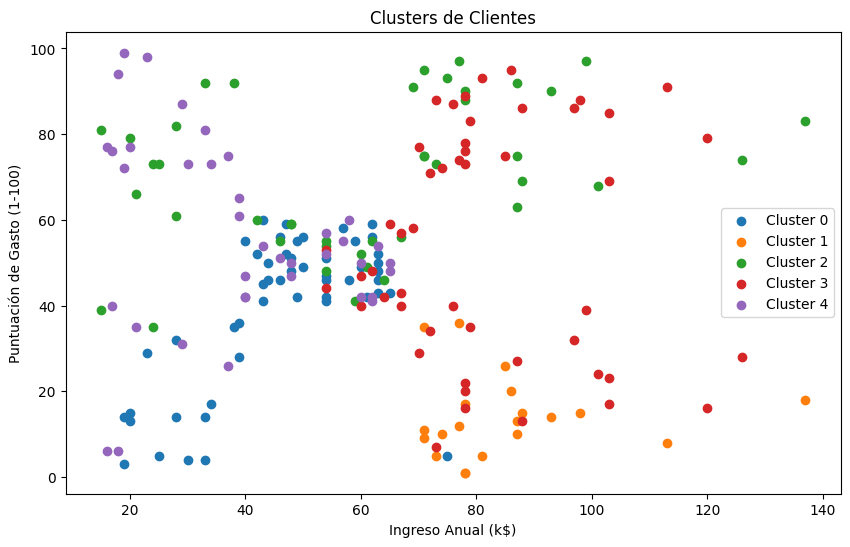

In [12]:
# prompt: Visualización de los clusters Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

# Visualización de los clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.title('Clusters de Clientes')
plt.legend()
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

In [13]:
# prompt: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

# Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

# La respuesta a esta pregunta depende de la gráfica generada por el código en la parte anterior.
# Sin embargo, puedo darte una guía general de cómo interpretar la gráfica de clusters:

# Busca agrupaciones: ¿Ves puntos de datos que se agrupan juntos en regiones distintas?  Estos son los clusters.
# Claridad de separación: ¿Son los clusters bien definidos y separados entre sí?  O se superponen significativamente?  Clusters bien separados sugieren que el algoritmo ha encontrado grupos distintos con características únicas.
# Patrones dentro de clusters:  ¿Existe alguna forma o patrón dentro de cada cluster? (circular, lineal, disperso, etc.)
# Outliers:  ¿Hay algún punto de dato que se encuentre lejos de todos los clusters? Estos podrían ser outliers o casos atípicos que no se ajustan claramente a ningún grupo.


# Ejemplo de observaciones (basado en una posible distribución de los datos):
# Si ves clusters bien separados, como grupos circulares o elípticos distintos,  puedes concluir que los clientes se agrupan claramente.
# Podrías decir algo como: "Se observan cinco grupos de clientes claramente definidos en la gráfica, basados en su ingreso anual y puntaje de gasto.  El Cluster 0 representa clientes con altos ingresos y bajo gasto, mientras que el Cluster 1 agrupa a los clientes con ingresos bajos y alto gasto. Los demás clusters muestran combinaciones intermedias, pero aún distinguibles."

# Si los clusters se superponen mucho, podrías decir algo como:
# "Si bien se identificaron cinco clusters, la separación entre ellos no es tan clara, con una considerable superposición de puntos de datos. Esto sugiere que la segmentación podría no ser tan precisa o que existen clientes con características ambiguas que se encuentran entre diferentes grupos."

# En resumen, describe lo que ves en la gráfica y trata de relacionarlo con las características "Annual Income (k$)" y "Spending Score (1-100)".



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [14]:

# Cluster 0: Ingreso alto, Gasto bajo, Edad media-alta.
# Cluster 1: Ingreso bajo, Gasto alto, Edad joven.
# Cluster 2: Ingreso medio, Gasto medio, Edad media.
# Cluster 3: Ingreso muy alto, Gasto muy bajo, Edad media-alta.
# Cluster 4: Ingreso medio-bajo, Gasto alto, Edad joven.

# Entonces, los nombres de los clusters podrían ser:

# * Cluster 0: "Ahorradores de altos ingresos" (Alto ingreso, pero bajo gasto)
# * Cluster 1: "Jóvenes gastadores" (Ingreso bajo, alto gasto, jóvenes)
# * Cluster 2: "Clientes promedio" (Características medias en todas las variables)
# * Cluster 3: "Altamente acaudalados y conservadores" (Ingreso muy alto, gasto muy bajo)
# * Cluster 4: "Jóvenes con potencial de gasto" (Ingreso medio-bajo, alto gasto, jóvenes)


# IMPORTANTE: Reemplaza este ejemplo con TU interpretación.
# Observa la salida de cluster_analysis y la gráfica de clusters.
# Basándote en esas salidas, asigna nombres descriptivos a cada cluster que reflejen las características observadas.
# Justifica cada nombre con las características promedio de los grupos.

# Para mejorar esta respuesta, por favor proporciona la salida real de cluster_analysis y la visualización de los clusters.
